In [4]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv(r"C:\Users\ACER\Downloads\bank-dataset.csv")
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [5]:
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11152,34,housemaid,married,secondary,no,390,yes,no,cellular,15,jul,659,3,-1,0,unknown,no
11153,43,admin.,single,secondary,no,35,no,no,telephone,9,nov,208,1,-1,0,unknown,no
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,-1,0,unknown,no
11155,35,blue-collar,married,secondary,no,80,yes,yes,cellular,21,nov,38,2,172,2,failure,no
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,jul,273,5,-1,0,unknown,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


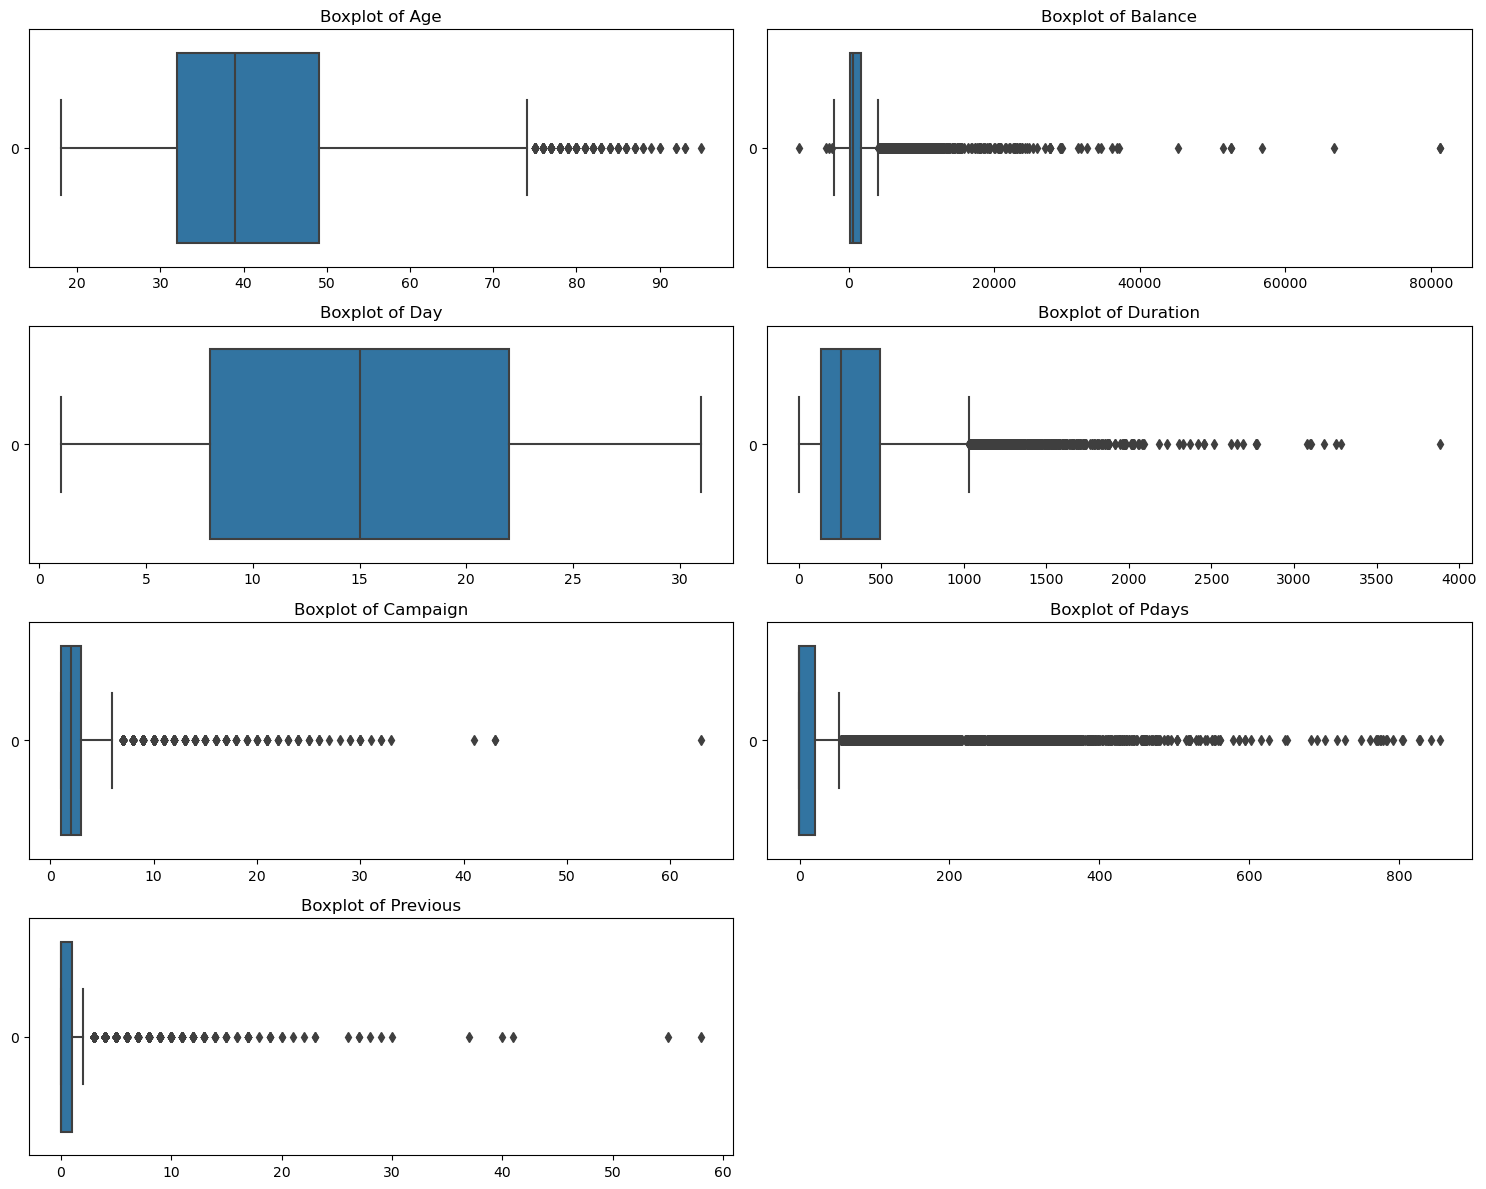

In [13]:
# Subsetting numeric columns
numeric_df = df.select_dtypes(include=['float', 'int'])

# Boxplots for numeric data
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
ax = ax.flatten()
numeric_col_iter = iter(numeric_df.columns.to_list())

for axis in list(ax):
    try:
        column_name = next(numeric_col_iter)
        sns.boxplot(data=numeric_df[column_name], ax=axis, orient='h')
        axis.set_title(f"Boxplot of {column_name.title()}")

    except StopIteration:
        axis.remove()

plt.tight_layout()

<Axes: xlabel='age', ylabel='Density'>

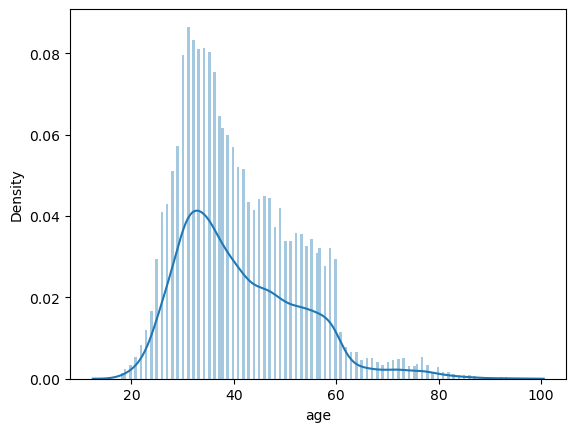

In [15]:
#Distribution of Age
sns.distplot(df.age, bins=150)

<Axes: xlabel='duration', ylabel='Density'>

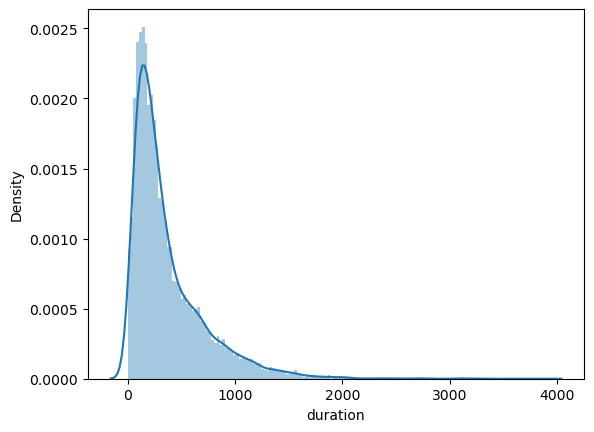

In [16]:
#Visualizing the distribution of the 'duration' column
sns.distplot(df.duration, bins=150)

In [20]:
#Copy for parsing
bank_data = df.copy()
#Exploring People who made a deposit Vs Job category
jobs = ['management','blue-collar','technician','admin.','services','retired','self-employed','student',\
        'unemployed','entrepreneur','housemaid','unknown']

for j in jobs:
    print("{:20} : {:10}". format(j, len(bank_data[(bank_data.deposit == "yes") & (bank_data.job ==j)])))

management           :       1301
blue-collar          :        708
technician           :        840
admin.               :        631
services             :        369
retired              :        516
self-employed        :        187
student              :        269
unemployed           :        202
entrepreneur         :        123
housemaid            :        109
unknown              :         34


In [21]:
#Different types of job categories and their counts
bank_data.job.value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [22]:
#Combine similar jobs into categiroes
bank_data['job'] = bank_data['job'].replace(['management', 'admin.'], 'white-collar')
bank_data['job'] = bank_data['job'].replace(['services','housemaid'], 'pink-collar')
bank_data['job'] = bank_data['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')
#New value counts
bank_data.job.value_counts()

job
white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: count, dtype: int64

In [23]:
#Displaying the count of unique values in the 'poutcome' column
bank_data.poutcome.value_counts()


poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

In [24]:
#Combining 'unknown' and 'other' as 'other' isn't really match with either 'success' or 'failure'
bank_data['poutcome'] = bank_data['poutcome'].replace(['other'] , 'unknown')
bank_data.poutcome.value_counts()

poutcome
unknown    8863
failure    1228
success    1071
Name: count, dtype: int64

In [25]:
#Dropping 'contact', as every participant has been contacted. 
bank_data.drop('contact', axis=1, inplace=True)
#Values for "default" : yes/no
bank_data["default"]
bank_data['default_cat'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)

#Values for "housing" : yes/no
bank_data["housing_cat"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)

#Values for "loan" : yes/no
bank_data["loan_cat"] = bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1, inplace=True)

#Values for "deposit" : yes/no
bank_data["deposit_cat"] = bank_data['deposit'].map({'yes':1, 'no':0})
bank_data.drop('deposit', axis=1, inplace=True)

#Day  : last contact day of the month
#Month: last contact month of year
#Dropping 'month' and 'day'
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)
#Converting categorical variables to dummies
bank_with_dummies = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])
bank_with_dummies.head()

,age,balance,duration,campaign,pdays,previous,default_cat,housing_cat,loan_cat,deposit_cat,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,-1,0,0,1,0,1,...,False,True,False,False,True,False,False,False,False,True
1,56,45,1467,1,-1,0,0,0,0,1,...,False,True,False,False,True,False,False,False,False,True
2,41,1270,1389,1,-1,0,0,1,0,1,...,False,True,False,False,True,False,False,False,False,True
3,55,2476,579,1,-1,0,0,1,0,1,...,False,True,False,False,True,False,False,False,False,True
4,54,184,673,2,-1,0,0,0,0,1,...,False,True,False,False,False,True,False,False,False,True


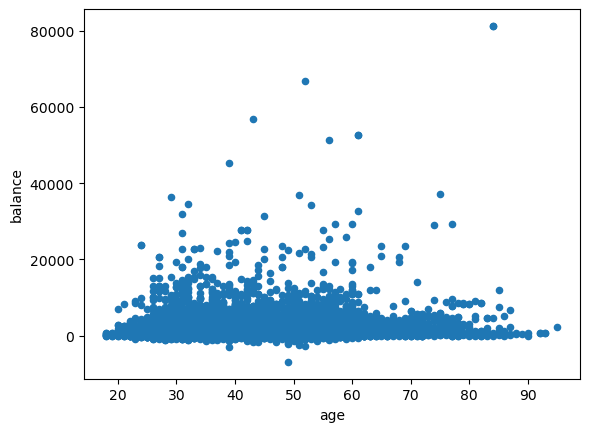

In [27]:
#Scatterplot showing age and balance
bank_with_dummies.plot(kind='scatter', x='age', y='balance');

#Across all ages, majority of people have savings of less than 35000

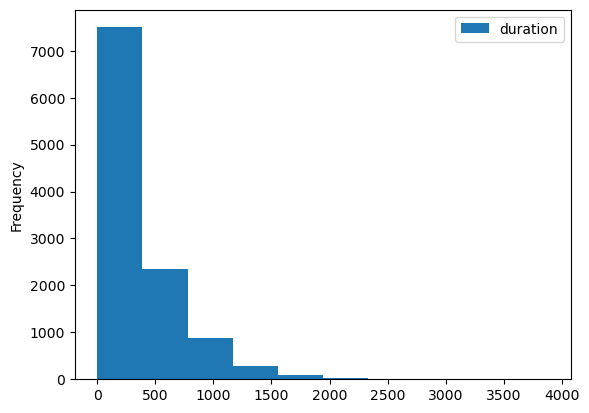

In [28]:
bank_with_dummies.plot(kind='hist', x='poutcome_success', y='duration');

In [29]:
#People who sign up to a term deposite
bank_with_dummies[bank_data.deposit_cat == 1].describe()

,age,balance,duration,campaign,pdays,previous,default_cat,housing_cat,loan_cat,deposit_cat
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0
mean,41.670070,1804.267915,537.294574,2.141047,68.702968,1.170354,0.009832,0.365854,0.091511,1.0
std,13.497781,3501.104777,392.525262,1.921826,118.822266,2.553272,0.098676,0.481714,0.288361,0.0
min,18.000000,-3058.000000,8.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,31.000000,210.000000,244.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,38.000000,733.000000,426.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,50.000000,2159.000000,725.000000,3.000000,98.000000,1.000000,0.000000,1.000000,0.000000,1.0
max,95.000000,81204.000000,3881.000000,32.000000,854.000000,58.000000,1.000000,1.000000,1.000000,1.0


<Axes: xlabel='job', ylabel='deposit_cat'>

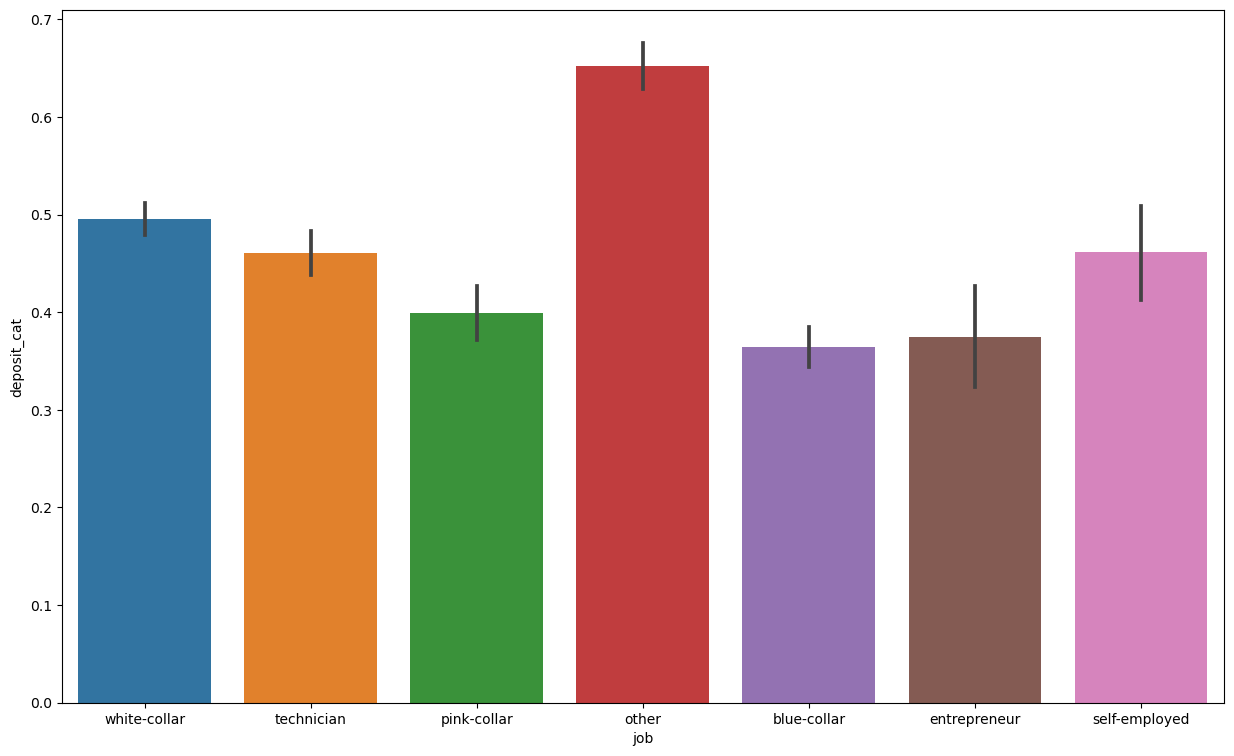

In [30]:
#Bar chart of job Vs deposite
plt.figure(figsize = (15,9))
sns.barplot(x='job', y = 'deposit_cat', data = bank_data)

<Axes: xlabel='poutcome', ylabel='duration'>

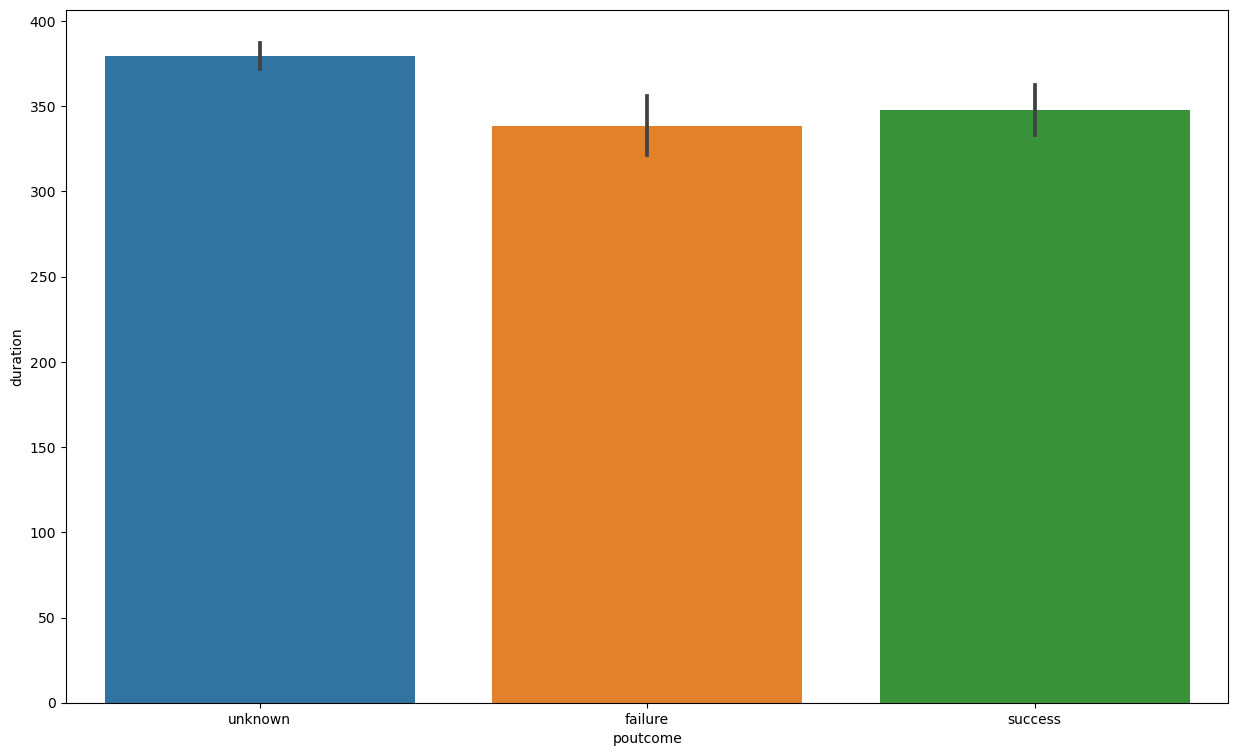

In [31]:
#Bar chart of "previous outcome" Vs "call duration"

plt.figure(figsize = (15,9))
sns.barplot(x='poutcome', y = 'duration', data = bank_data)

In [32]:
#Copying
bankcl = bank_with_dummies
#The Correlation matrix
corr = bankcl.corr()
corr

,age,balance,duration,campaign,pdays,previous,default_cat,housing_cat,loan_cat,deposit_cat,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
age,1.000000,0.112300,0.000189,-0.005278,0.002774,0.020169,-0.011425,-0.168700,-0.031418,0.034901,...,0.186349,0.318436,-0.467799,0.231150,-0.094400,-0.101372,0.077761,-0.008071,0.062114,-0.038992
balance,0.112300,1.000000,0.022436,-0.013894,0.017411,0.030805,-0.060954,-0.077092,-0.084589,0.081129,...,-0.017586,0.025431,-0.014994,-0.000673,-0.070609,0.069128,0.014596,0.001695,0.045603,-0.034524
duration,0.000189,0.022436,1.000000,-0.041557,-0.027392,-0.026716,-0.009760,0.035051,-0.001914,0.451919,...,0.021364,-0.036179,0.023847,0.013405,0.003820,-0.006813,-0.015887,-0.033966,-0.022578,0.042725
campaign,-0.005278,-0.013894,-0.041557,1.000000,-0.102726,-0.049699,0.030975,0.006660,0.034722,-0.128081,...,-0.006828,0.047722,-0.046165,0.019915,-0.013834,-0.005427,0.012976,-0.080188,-0.091807,0.128907
pdays,0.002774,0.017411,-0.027392,-0.102726,1.000000,0.507272,-0.036282,0.064497,-0.030416,0.151593,...,-0.015574,-0.019280,0.031280,-0.041135,0.017792,0.011566,-0.001479,0.602615,0.329567,-0.706294
previous,0.020169,0.030805,-0.026716,-0.049699,0.507272,1.000000,-0.035273,-0.000840,-0.022668,0.139867,...,-0.026566,-0.005176,0.023817,-0.024852,-0.004620,0.028146,-0.011898,0.335870,0.325477,-0.496921
default_cat,-0.011425,-0.060954,-0.009760,0.030975,-0.036282,-0.035273,1.000000,0.011076,0.076434,-0.040680,...,0.019633,-0.006819,-0.006255,0.013858,-0.000618,-0.011768,0.005421,-0.024650,-0.040272,0.048403
housing_cat,-0.168700,-0.077092,0.035051,0.006660,0.064497,-0.000840,0.011076,1.000000,0.076761,-0.203888,...,0.007430,0.036305,-0.043817,0.017002,0.118514,-0.114955,-0.053191,0.087741,-0.136299,0.031375
loan_cat,-0.031418,-0.084589,-0.001914,0.034722,-0.030416,-0.022668,0.076434,0.076761,1.000000,-0.110580,...,0.026463,0.044148,-0.065288,0.006854,0.079583,-0.067513,-0.050249,0.006264,-0.080370,0.053686
deposit_cat,0.034901,0.081129,0.451919,-0.128081,0.151593,0.139867,-0.040680,-0.203888,-0.110580,1.000000,...,0.005228,-0.092157,0.094632,-0.063002,-0.051952,0.094598,0.014355,0.020714,0.286642,-0.224785


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

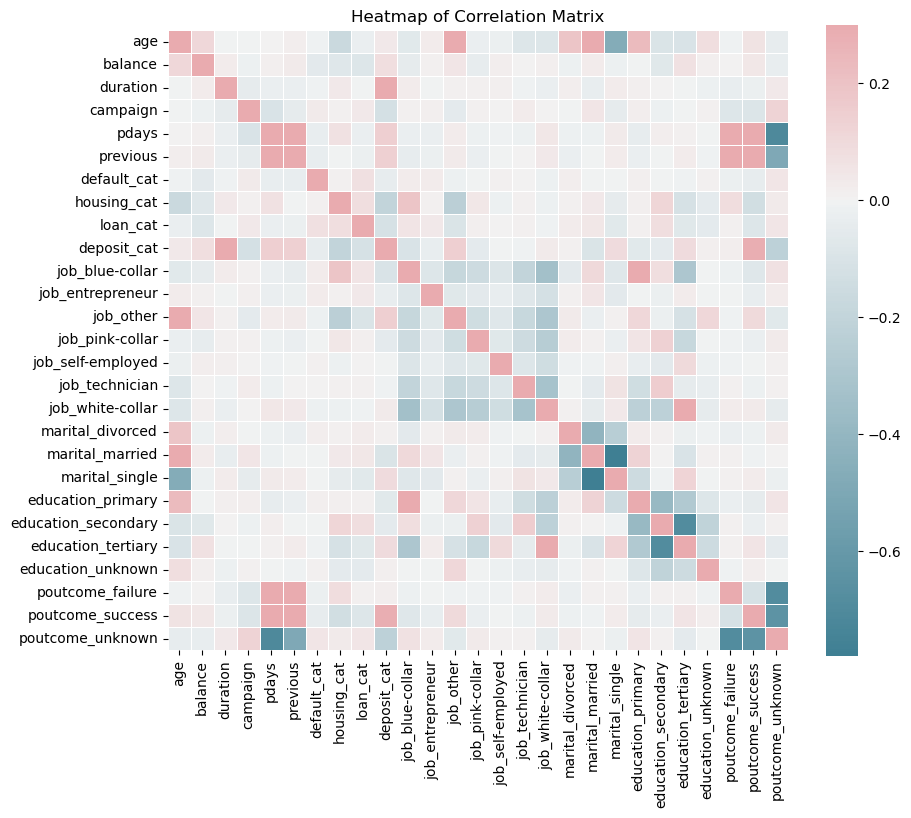

In [33]:
#Heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [34]:
#Extracting the deposte_cat column (the dependent variable)
corr_deposite = pd.DataFrame(corr['deposit_cat'].drop('deposit_cat'))
corr_deposite.sort_values(by = 'deposit_cat', ascending = False)

,deposit_cat
duration,0.451919
poutcome_success,0.286642
pdays,0.151593
job_other,0.144408
previous,0.139867
marital_single,0.094632
education_tertiary,0.094598
balance,0.081129
age,0.034901
job_white-collar,0.031621


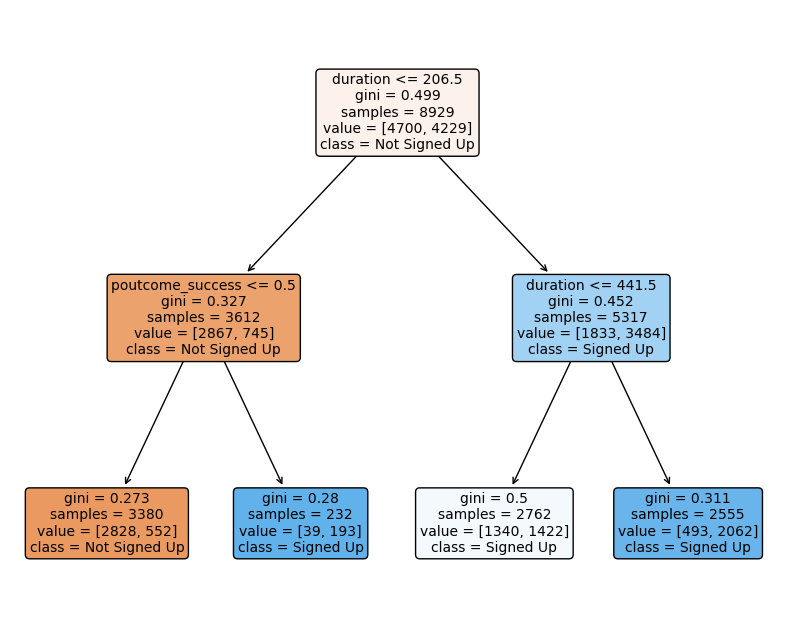

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train-Test split: 20% test data
data_drop_deposite = bankcl.drop('deposit_cat', axis=1)

label = bankcl.deposit_cat
data_train, data_test, label_train, label_test = train_test_split(data_drop_deposite, label, test_size=0.2, random_state=50)

# Decision tree with depth = 2
dt2 = DecisionTreeClassifier(random_state=1, max_depth=2)
dt2.fit(data_train, label_train)

# Plotting the decision tree
plt.figure(figsize=(10, 8))
plot_tree(dt2,
          feature_names=data_drop_deposite.columns.tolist(),
          class_names=['Not Signed Up', 'Signed Up'],
          filled=True,  # Fill nodes with colors
          rounded=True,  # Round the boxes
          fontsize=10,  # Font size for the text in the tree
          )
plt.show()

In [36]:
#Making predictions on the test set
preds = dt2.predict(data_test)

#Calculating accuracy
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(label_test, preds)))

#Making predictions on the test set using predict_proba
probs = dt2.predict_proba(data_test)[:,1]

#Calculating the AUC metric
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(label_test, probs)))


Accuracy score: 
0.7268248992386923

Area Under Curve: 
0.7880265888143609
